# pandas tutorial

![pandas logo](https://pandas.pydata.org/_static/pandas_logo.png)

*Author: Fabio Hernandez*

*Last updated: 2019-05-15*

*Location:* https://github.com/airnandez/numpandas

--------------------
## Introduction

This is a short tutorial for helping you getting familiar with the **pandas** library, which is built on top of NumPy: you can find an introduction to NumPy in [this notebook](NumPy.ipynb).

This tutorial draws inspiration, ideas and sometimes material from several publicly available sources. Please see the [Acknowledgements](#Acknowledgements) section for details.

-----------------------
## Reference documentation

The entry point to the documentation of the stable release of pandas is http://pandas.pydata.org/pandas-docs/stable. It includes a [user guide](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html), an [API reference](http://pandas.pydata.org/pandas-docs/stable/reference/index.html) and a [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

The [DataCamp pandas Cheat Sheet](https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf) can also be a useful resource.

---------------------
## Import

**pandas** is customarily imported as shown below:

In [1]:
import pandas as pd
pd.__version__

'0.24.2'

In addition, for the examples given in this notebook we will need some packages from the Python standard library so we import them here:

In [2]:
import datetime

----------
## Overview

**pandas** offers three main data structures designed to facilitate the programmatic manipulation of datasets with flexibility. Those data structures are `DataFrame`, `Series` and `Index`. We will start exploring what a `DataFrame` is and what we can do with it.

![dataframe](../images/dataframe-axis.png)

---------------------
## Load the dataset

Read a sample dataset, located in the `data` subdirectory, which is formatted as a sequence of lines, each line composed of series of comma-separated values. Our sample dataset contains some data about the European Union, extracted from several sources, including [Wikipedia](https://en.wikipedia.org/wiki/European_Union), [EuroStat](https://ec.europa.eu/eurostat) and the [EU Budget](http://ec.europa.eu/budget) site.

In [3]:
%%bash

# Inspect a few lines of the text file containing the dataset
head -5 "./data/european_union.csv"

country;country_code;capital;accession_date;population;euro_zone_member;immigration;emigration;contribution_to_eu_budget_millions_euro;expenditure_eu_budget_millions_euro
Austria;AT;Vienna;1995-01-01;8822267;TRUE;111801;66144;1869;1743
Belgium;BE;Brussels;1957-03-25;11398589;TRUE;126703;89690;2172;7358
Bulgaria;BG;Sofia;2007-01-01;7050034;FALSE;25597;31586;276;1896
Croatia;HR;Zagreb;2013-07-01;4105493;FALSE;15553;47352;257;663


In [4]:
# This particular dataset uses ';' as separator, instead of the more usual ','
df = pd.read_csv('./data/european_union.csv', sep=';')

In [5]:
# Inspect the dimensions of the dataframe
rows, columns = df.shape
print(f'This dataframe has {rows} rows and {columns} columns')

This dataframe has 28 rows and 10 columns


**pandas** has built-in methods for doing I/O with files in several formats, including flat files (csv, fixed-width format, msgpack), Excel, JSON, HTML, HDF5, parquet, SQL, etc. See the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/io.html#flat-file) for details.

---------------------
## Exploring the dataset contents

To get an idea of what data is included in the dataset, you can explore the contents of the whole dataframe.

**WARNING**: it is not always a good idea to display the entire dataset, depending of the size of the data. It is recommended to first inspect the size of the dataframe as done above. This dataset is small, so display it:

In [6]:
df

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
1,Belgium,BE,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
2,Bulgaria,BG,Sofia,2007-01-01,7050034,False,25597,31586,276,1896
3,Croatia,HR,Zagreb,2013-07-01,4105493,False,15553,47352,257,663
4,Cyprus,CY,Nicosia,2004-05-01,864236,True,21306,15105,98,207
5,Czechia,CZ,Prague,2004-05-01,10610055,False,51847,27316,963,3895
6,Denmark,DK,Copenhaguen,1973-01-01,5781190,False,68579,56403,1577,1459
7,Estonia,EE,Tallinn,2004-05-01,1319133,True,17616,12358,107,648
8,Finland,FI,Helsinki,1995-01-01,5513130,True,31797,16973,1181,1501
9,France,FR,Paris,1957-03-25,66926166,True,369964,312554,11726,13505


You can also explore a fraction of the dataset by displaying, for instance, a few rows at the begining or at the end of the dataframe:

In [7]:
# Display the first 3 rows of the dataset. By default, the first 5 rows will be displayed
df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
1,Belgium,BE,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
2,Bulgaria,BG,Sofia,2007-01-01,7050034,False,25597,31586,276,1896


You can also explore the last rows of the dataset or any intermediate rows, by using notation similar to the one used with NumPy arrays, on top of which **pandas** is built:

In [8]:
# Display the last 3 rows of the dataset
df.tail(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
25,Spain,ES,Madrid,1986-01-01,46658447,True,532132,368860,5756,9664
26,Sweden,SE,Stockholm,1995-01-01,10120242,False,144489,45620,2448,1504
27,United Kingdom,GB,London,1973-01-01,66273576,False,644209,359665,12368,6326


In [9]:
# Display the rows from position 10 up to position 14 (not included)
df[10:14]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
10,Germany,DE,Berlin,1957-03-25,82792351,True,917109,560700,17130,10927
11,Greece,EL,Athens,1981-01-01,10741165,True,112247,103327,5130,5130
12,Hungary,HU,Budapest,2004-05-01,9778371,False,68070,39829,603,4049
13,Ireland,IE,Dublin,1973-01-01,4830392,True,78499,64068,1386,1818


**pandas** is designed for efficient handling of datasets organized as follows:

* each observation is saved in its own row
* each variable is saved in its own column

Our sample dataset is organized in exactly that way.

### An aside: understanding the dataset

In order to analyse any dataset, you need a good understanding of the meaning of the data. Here are the details of our sample data set:

| column                                    | meaning |
| ------------------------------------------|----------|
| `country`                                 | name of the country, in English |
| `country_code`                            | code of the country, as used by [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes) |
| `accession_date`                          | date of accesion of the country to the European Union (format: yyyy-mm-dd) |
| `population`                              | the number of persons having their usual residence in each country as of January 1st, 2018 (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00001)) |
| `euro_zone_member`                        | `True` if the country is member of the [Eurozone](https://en.wikipedia.org/wiki/Eurozone)  |
| `immigration`                             | total number of long-term immigrants arriving into each country in 2017, as reported by each country (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00176)) |
| `emigration`                              | total number of long-term emigrants leaving from the reporting country in 2017, as reported by each country (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00177))  | 
| `contribution_to_eu_budget_millions_euro` | contribution to the EU budget for each country (based on the GNI), for year 2017, in millions euros (source: [European Commission](http://ec.europa.eu/budget/graphs/revenue_expediture.html)) |
| `expenditure_eu_budget_millions_euro`     | expenditure of the EU budget per country (for all programs), for year 2017, in millions euros (source: [European Commission](http://ec.europa.eu/budget/graphs/revenue_expediture.html)) |

Generally speaking, in order to draw sensible conclusions from any dataset you are analysing, make sure you understand precisely what is contained in the dataset and you understand where the data comes from.

### `dataframe` properties

You can get some information on the properties of `dataframe`. The attribute `Dataframe.columns` is an object of type `Index` (see [reference documentation](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html#index)):

In [10]:
# Get the name of the columns in this dataframe
for c in df.columns:
    print(c)

country
country_code
capital
accession_date
population
euro_zone_member
immigration
emigration
contribution_to_eu_budget_millions_euro
expenditure_eu_budget_millions_euro


In [11]:
# Get the number of values (of any type) contained in the dataframe
print(f'This dataframe contains {df.size} values')

This dataframe contains 280 values


In [12]:
# Get the amount of RAM (in bytes) used for storing this dataframe contents
df.memory_usage()

Index                                       80
country                                    224
country_code                               224
capital                                    224
accession_date                             224
population                                 224
euro_zone_member                            28
immigration                                224
emigration                                 224
contribution_to_eu_budget_millions_euro    224
expenditure_eu_budget_millions_euro        224
dtype: int64

### Cleaning the data

Very often, the *raw* data needs some cleaning, so that we can easily manipulate them it in **pandas**. For instance, in this particular example, we need to make sure that **pandas** understands that the column `accession_date` is a date and not just a string. This is useful for comparisons and filtering, that will visit later on.

In [13]:
# Display the types of each column in the dataframe
df.dtypes

country                                    object
country_code                               object
capital                                    object
accession_date                             object
population                                  int64
euro_zone_member                             bool
immigration                                 int64
emigration                                  int64
contribution_to_eu_budget_millions_euro     int64
expenditure_eu_budget_millions_euro         int64
dtype: object

In [14]:
# Convert column 'accession_date' to a date
df['accession_date'] = df['accession_date'].astype('datetime64[D]')
df['accession_date'].dtype

dtype('<M8[ns]')

-------
## Selecting and filtering

**pandas** provides powerful built-in tools for filtering the data row-wise and column-wise.

In [15]:
# This is a utility function we use for displaying the dataframe, which we use later
def highlight_column(s):
    return 'background-color: PaleGoldenrod'

### select all values in a given column

Selecting all the values in a column is a frequent operation we need to perform on any dataframe:

In [16]:
df.head(3).style.applymap(highlight_column, subset=['population'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8822267,True,111801,66144,1869,1743
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11398589,True,126703,89690,2172,7358
2,Bulgaria,BG,Sofia,2007-01-01 00:00:00,7050034,False,25597,31586,276,1896


In [17]:
# Get the values of the column 'population' for all rows
df['population']

0      8822267
1     11398589
2      7050034
3      4105493
4       864236
5     10610055
6      5781190
7      1319133
8      5513130
9     66926166
10    82792351
11    10741165
12     9778371
13     4830392
14    60483973
15     1934379
16     2808901
17      602005
18      475701
19    17181084
20    37976687
21    10291027
22    19530631
23     5443120
24     2066880
25    46658447
26    10120242
27    66273576
Name: population, dtype: int64

**NOTE**: it is possible to use the notation `df.population` to select all the values of the column `population`. However, this notation is not recommended since the name of the column must be a valid Python identifier for it to work. For instacnce, if the name of my column is `budget-contribution`, this notation cannot be used:

In [18]:
# WARNING: This notation is NOT recommended. Use instead:: df['population']
df.population

0      8822267
1     11398589
2      7050034
3      4105493
4       864236
5     10610055
6      5781190
7      1319133
8      5513130
9     66926166
10    82792351
11    10741165
12     9778371
13     4830392
14    60483973
15     1934379
16     2808901
17      602005
18      475701
19    17181084
20    37976687
21    10291027
22    19530631
23     5443120
24     2066880
25    46658447
26    10120242
27    66273576
Name: population, dtype: int64

We can perform operations on all the numerical values of a column, such as descriptive statistics:

In [19]:
# Display some descriptive statistics of the values in the 'population' column
df['population'].describe()

count    2.800000e+01
mean     1.829926e+07
std      2.376261e+07
min      4.757010e+05
25%      3.781345e+06
50%      9.300319e+06
75%      1.776847e+07
max      8.279235e+07
Name: population, dtype: float64

In [20]:
# Sum all the values of the column 'population'
eu_population = df['population'].sum()
print(f'The population of the EU is {eu_population:,} people')

The population of the EU is 512,379,225 people


You can also perform an operation on all the values of one (or more) columns. For instance, let's convert all the population values to millions before performing some additional operations:

In [21]:
population = df['population'] / 1_000_000  # you can also use the notations 1e6 or 1000000
min_population, max_population = population.min(), population.max()
total_population = population.sum()
num_countries = population.count()

print(f'Least populous country has {min_population:.1f} millions')
print(f'Most populous country has {max_population:.1f} millions')
print(f'Total EU population is {total_population:.1f} millions located in {num_countries} countries')

Least populous country has 0.5 millions
Most populous country has 82.8 millions
Total EU population is 512.4 millions located in 28 countries


### select rows satisfying one or more conditions

You can select the rows of the dataframe that satisfy one or more conditions on the values of a column. You can use logical expressions with those conditions (i.e. using operators and, or, not) to select the rows of interest:

In [22]:
# Select all the rows with value True in the column 'euro_zone_member'
is_eurozone_member = df['euro_zone_member'] == True
euro_zone_df = df[is_eurozone_member]

euro_zone_df.style.applymap(highlight_column, subset=['euro_zone_member'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8822267,True,111801,66144,1869,1743
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11398589,True,126703,89690,2172,7358
4,Cyprus,CY,Nicosia,2004-05-01 00:00:00,864236,True,21306,15105,98,207
7,Estonia,EE,Tallinn,2004-05-01 00:00:00,1319133,True,17616,12358,107,648
8,Finland,FI,Helsinki,1995-01-01 00:00:00,5513130,True,31797,16973,1181,1501
9,France,FR,Paris,1957-03-25 00:00:00,66926166,True,369964,312554,11726,13505
10,Germany,DE,Berlin,1957-03-25 00:00:00,82792351,True,917109,560700,17130,10927
11,Greece,EL,Athens,1981-01-01 00:00:00,10741165,True,112247,103327,5130,5130
13,Ireland,IE,Dublin,1973-01-01 00:00:00,4830392,True,78499,64068,1386,1818
14,Italy,IT,Rome,1957-03-25 00:00:00,60483973,True,343440,155110,8823,9795


In [23]:
# This is another more compact way of expressing the same filter,
# but is not necessarily easier to read
euro_zone_df = df[df['euro_zone_member'] == True]
euro_zone_df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
1,Belgium,BE,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
4,Cyprus,CY,Nicosia,2004-05-01,864236,True,21306,15105,98,207


The result of a select operation is generally a dataframe object. You can perform operations on that dataframe as you would on any other dataframe.

In [24]:
# Compute the population of the eurozone
is_eurozone_member = df['euro_zone_member'] == True
eurozone_population = df[is_eurozone_member]['population'].sum() / 1_000_000
print(f'The population of the Euro zone is {eurozone_population:.2f} millions')

The population of the Euro zone is 341.15 millions


In [25]:
# Select the countries which joined the EU since year 1989 which adopted the Euro
is_eurozone_member = df['euro_zone_member'] == True
joined_since_1989  = df['accession_date'] >= datetime.datetime(1989, 1, 1)

df[is_eurozone_member & joined_since_1989]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
4,Cyprus,CY,Nicosia,2004-05-01,864236,True,21306,15105,98,207
7,Estonia,EE,Tallinn,2004-05-01,1319133,True,17616,12358,107,648
8,Finland,FI,Helsinki,1995-01-01,5513130,True,31797,16973,1181,1501
15,Latvia,LV,Riga,2004-05-01,1934379,True,9916,17724,134,737
16,Lithuania,LT,Vilnius,2004-05-01,2808901,True,20368,47925,198,1575
18,Malta,MT,Valletta,2004-05-01,475701,True,21676,7020,59,201
23,Slovakia,SK,Bratislava,2004-05-01,5443120,True,7188,3466,455,1645
24,Slovenia,SI,Ljubljana,2004-05-01,2066880,True,18808,17555,211,476


In [26]:
# Select the countries which are either founder members or have a population
# of at least 20M people
is_founder = df['accession_date'] == datetime.datetime(1957, 3, 25)
is_bigger_than_20m = df['population'] >= 20_000_000
df[is_founder | is_bigger_than_20m]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
1,Belgium,BE,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
9,France,FR,Paris,1957-03-25,66926166,True,369964,312554,11726,13505
10,Germany,DE,Berlin,1957-03-25,82792351,True,917109,560700,17130,10927
14,Italy,IT,Rome,1957-03-25,60483973,True,343440,155110,8823,9795
17,Luxembourg,LU,Luxembourg City,1957-03-25,602005,True,24379,13831,220,1827
19,Netherlands,NL,Amsterdam,1957-03-25,17181084,True,189646,108231,3586,2417
20,Poland,PL,Warsaw,2004-05-01,37976687,False,209353,218492,2220,11921
25,Spain,ES,Madrid,1986-01-01,46658447,True,532132,368860,5756,9664
27,United Kingdom,GB,London,1973-01-01,66273576,False,644209,359665,12368,6326


In [27]:
# Compare the populations of founder members vs. non-founder member countries
is_founder = df['accession_date'] == datetime.datetime(1957, 3, 25)

founders_population = df[is_founder]['population'].sum() / 1e6
non_founders_population = df[~is_founder]['population'].sum() / 1e6

print(f"Founders' population:     {founders_population:.0f} millions")
print(f"Non-founders' population: {non_founders_population:.0f} millions")

Founders' population:     239 millions
Non-founders' population: 273 millions


### select specific rows

One of the most useful methods for selecting rows and values within a row is [DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). It accepts several forms as input, but a general one is:

`df.loc[rows, cols]`


In [28]:
# Retrieve the entire row with data for France
# We need to provide the index of the row we want to retrieve
df.loc[9, :]

country                                                 France
country_code                                                FR
capital                                                  Paris
accession_date                             1957-03-25 00:00:00
population                                            66926166
euro_zone_member                                          True
immigration                                             369964
emigration                                              312554
contribution_to_eu_budget_millions_euro                  11726
expenditure_eu_budget_millions_euro                      13505
Name: 9, dtype: object

In [29]:
# Retrieve specific columns of a given row
df.loc[9, ['capital', 'contribution_to_eu_budget_millions_euro']]

capital                                    Paris
contribution_to_eu_budget_millions_euro    11726
Name: 9, dtype: object

In [30]:
# Retrieve specific columns of a range of rows
df.loc[9:11, ['country', 'population']]

,country,population
9,France,66926166
10,Germany,82792351
11,Greece,10741165


### set a meaningful index

It is convenient to use an index which is meaningful to allow us to select an entire row or specific columns within a row using a meaningful label. You can set the index of a dataframe when you load it from a file or after the dataframe is already in memory:

In [31]:
df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
1,Belgium,BE,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
2,Bulgaria,BG,Sofia,2007-01-01,7050034,False,25597,31586,276,1896


In [32]:
# Use the contents of the `country_code` column as the dataframe index
# We don't want the original dataframe to be modified, so we use a new variable
df_new = df.set_index('country_code')
df_new.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
BE,Belgium,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
BG,Bulgaria,Sofia,2007-01-01,7050034,False,25597,31586,276,1896


We can now use that more meaningful index to select the rows of interest:

In [33]:
# Retrieve the population for countries ES and DE
df_new.loc[['ES', 'DE'], ['population']]

,population
country_code,
ES,46658447
DE,82792351


We can also set the index when loading the data to memory, by specifying the column number we want to use as the index of the dataframe:

In [34]:
df = pd.read_csv('./data/european_union.csv', sep=';', index_col=1)
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
BE,Belgium,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
BG,Bulgaria,Sofia,2007-01-01,7050034,False,25597,31586,276,1896


------------
## Sorting

You can sort the contents of a dataframe, according to the values of a set of columns:

In [35]:
# Show the mediterranean countries, sorted according to their accession date and population
mediterraneans = ['Spain', 'France', 'Italy', 'Slovenia', 'Croatia', 'Greece']
is_mediterranean = df['country'].isin(mediterraneans)
df[is_mediterranean].sort_values(by=['accession_date', 'population'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
IT,Italy,Rome,1957-03-25,60483973,True,343440,155110,8823,9795
FR,France,Paris,1957-03-25,66926166,True,369964,312554,11726,13505
EL,Greece,Athens,1981-01-01,10741165,True,112247,103327,5130,5130
ES,Spain,Madrid,1986-01-01,46658447,True,532132,368860,5756,9664
SI,Slovenia,Ljubljana,2004-05-01,2066880,True,18808,17555,211,476
HR,Croatia,Zagreb,2013-07-01,4105493,False,15553,47352,257,663


You can also retrieve the N largest (or N smallest) rows, according to the value of some columns:

In [36]:
# Get the top 5 countries according to their emigration values
df.nlargest(5, columns=['emigration'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
DE,Germany,Berlin,1957-03-25,82792351,True,917109,560700,17130,10927
ES,Spain,Madrid,1986-01-01,46658447,True,532132,368860,5756,9664
GB,United Kingdom,London,1973-01-01,66273576,False,644209,359665,12368,6326
FR,France,Paris,1957-03-25,66926166,True,369964,312554,11726,13505
RO,Romania,Bucharest,2007-01-01,19530631,False,177435,242193,926,4742


---------------------
## Modifying the dataframe

You will often need to modify the dataframe, for instance, for cleaning it, for extending it or for computing new values useful in the data analysis process.

Please note that the modifications are applied to the in-memory data, not to the disk file, unless you explicitely do so.

In [37]:
# Rename some dataframe columns to use shorter names
df = df.rename(columns={
    # current column name                      new column name
    'contribution_to_eu_budget_millions_euro': 'budget_contribution',
    'expenditure_eu_budget_millions_euro':     'budget_expenditure',
})
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
BE,Belgium,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
BG,Bulgaria,Sofia,2007-01-01,7050034,False,25597,31586,276,1896


You can also extend the dataframe by creating new columns, which values may be computed using other columns:

In [38]:
# Add the budget contribution and the budget expenditure per capita
df['budget_contribution_per_capita'] = (df['budget_contribution'] * 1_000_000 ) / df['population']
df['budget_expenditure_per_capita']  = (df['budget_expenditure'] * 1_000_000 ) / df['population']

df.head(4).style.applymap(highlight_column, subset=['budget_contribution_per_capita', 'budget_expenditure_per_capita'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure,budget_contribution_per_capita,budget_expenditure_per_capita
country_code,,,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743,211.85,197.568
BE,Belgium,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358,190.55,645.518
BG,Bulgaria,Sofia,2007-01-01,7050034,False,25597,31586,276,1896,39.1487,268.935
HR,Croatia,Zagreb,2013-07-01,4105493,False,15553,47352,257,663,62.5991,161.491


We can also compute a `Series` of values from the values in the columns of the dataframe:

In [39]:
# Compute the net contribution to the EU budget for each country
net_contribution = df['budget_contribution_per_capita'] - df['budget_expenditure_per_capita']
net_contribution.sort_values(ascending=True)

country_code
LU   -2669.413045
LT    -490.227317
BE    -454.968593
EE    -410.117858
HU    -352.410437
LV    -311.727950
MT    -298.506835
PT    -293.653879
CZ    -276.341640
PL    -255.446190
BG    -229.786126
SK    -218.624612
RO    -195.385392
SI    -128.212572
CY    -126.122957
HR     -98.891899
IE     -89.433735
ES     -83.757610
FI     -58.043253
FR     -26.581532
IT     -16.070373
EL       0.000000
AT      14.282043
DK      20.411023
NL      68.039944
DE      74.922380
GB      91.167557
SE      93.278402
dtype: float64

In [40]:
print(f'The net contribution by France to the 2017 EU budget was approx. {net_contribution["FR"]:.0f}€ per capita')

The net contribution by France to the 2017 EU budget was approx. -27€ per capita


We can use the methods `idxmin()` (or `idxmax()`) to retrieve the index of the minimum (or maximum) value of a column. In our case, we can use this to retrieve the country code (i.e. the value of the dataframe index) and then the country name:

In [41]:
# Retrieve the code of the countries with minimum and maximum value on the
# 'budget_expenditure' column
expenditure = df['budget_expenditure']
country_min_expenditure = df.loc[expenditure.idxmin(), 'country']
country_max_expenditure = df.loc[expenditure.idxmax(), 'country']

print(f'The country with lowest EU budget expenditure in 2017 was:  {country_min_expenditure}')
print(f'The country with highest EU budget expenditure in 2017 was: {country_max_expenditure}')

The country with lowest EU budget expenditure in 2017 was:  Malta
The country with highest EU budget expenditure in 2017 was: France


---------------------
## Serializing a dataframe

You can save the contents of a dataframe to disk. **pandas** natively support several formats (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#serialization-io-conversion)):

In [42]:
# Save the (modified) dataframe to disk, in CSV format
df.to_csv('./data/my_dataset.csv')

In [43]:
%%bash

head -5 './data/my_dataset.csv'

country_code,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure,budget_contribution_per_capita,budget_expenditure_per_capita
AT,Austria,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743,211.850310130038,197.5682667504849
BE,Belgium,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358,190.5499005183887,645.5184935609135
BG,Bulgaria,Sofia,2007-01-01,7050034,False,25597,31586,276,1896,39.14874736774319,268.934873221888
HR,Croatia,Zagreb,2013-07-01,4105493,False,15553,47352,257,663,62.59905935779211,161.49095857671662


----------
## Grouping

In some datasets, data is organized so that grouping the observations (i.e. the rows) is necessary to answer some analysis questions. **pandas** provide useful tools for grouping data based on the values of one or more columns.

The data in the dataset we have been working on does not require grouping. We load a different, more complex and bigger dataset to explore how grouping works.

The dataset we will use contains data about the names given to babies in France during from year 1900 to year 2017. For each given name you can find the sex of the baby (male or female), the year of birth, the department and the number of babies registered with that given name per year and per department.

You can find details of this public dataset, including the exact meaning of each variable (in French),  at https://www.insee.fr/fr/statistiques/2540004

In [44]:
# Forget the dataset we have been using so far
del df

In [45]:
# Load the new dataset. Its fields are separated by tabs.
# We ask pandas to interpret the columns 'annais' and 'dpt' as strings to avoid error with missing
# values
df = pd.read_csv('./data/prenoms-fr-1900-2017.tsv.gz', sep='\t', dtype={'annais':str, 'dpt':str})
df.shape

(3573026, 5)

In [46]:
# Inspect the types of the columns dataset
df.dtypes

sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object

In [47]:
# This is a utility function we use for displaying the dataframe
def highlight_missing(s):
    missings = ('XX', 'XXXX')
    return 'color: white; background-color: Crimson' if s in missings else ''

In [48]:
# Rename some columns to use more meaningful names
df = df.rename(columns={
    'sexe':      'sex',
    'preusuel':  'name',
    'annais':    'year',
    'dpt':       'department',
    'nombre':    'count'})

df.head().style.applymap(highlight_missing, subset=['year', 'department'])

,sex,name,year,department,count
0,1,A,XXXX,XX,28
1,1,AADAM,XXXX,XX,24
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


As you can see above, there are rows with missing values, which in this case are represented by the strings `XXXX` for year or `XX` for the department. For the purposes of this tutorial, we ignore those rows:

In [49]:
# Drop rows with missing department and year
df.drop(df[df['department'] == 'XX'].index, inplace=True)
df.drop(df[df['year'] == 'XXXX'].index, inplace=True)

# Convert columns 'department' and 'year' to numeric values
df['department'] = pd.to_numeric(df['department'])
df['year']       = pd.to_numeric(df['year'])

df.dtypes

sex            int64
name          object
year           int64
department     int64
count          int64
dtype: object

In [50]:
# In this dataset, the sex is represented as 1 for males and 2 for females
# Define some convenient constants
MALE = 1
FEMALE = 2

In [51]:
# Count the number of babies of each sex contained in the dataset
boys = df[df['sex'] == MALE]
girls = df[df['sex'] == FEMALE]

print(f"Babies registered from 1900 to 2017:")
print(f"   boys: {boys['count'].sum():,}")
print(f"  girls: {girls['count'].sum():,}")
print(f"  total: {df['count'].sum():,}")

Babies registered from 1900 to 2017:
   boys: 38,917,177
  girls: 37,418,745
  total: 76,335,922


We want to know how many boys were given the name **Zinedine** before an after year 1998, when France won the football world cup:

In [52]:
zinedines = boys[boys['name'] == 'ZINEDINE']
zinedines_before_1998 = zinedines[zinedines['year'] < 1998]['count'].sum()
zinedines_after_1998  = zinedines[zinedines['year'] >= 1998]['count'].sum()

print(f"Number of boys named 'Zinedine' in France:")
print(f"   before 1998: {zinedines_before_1998: 5}")
print(f"    since 1998:  {zinedines_after_1998: 5}")

Number of boys named 'Zinedine' in France:
   before 1998:    50
    since 1998:   1129


We want to get more details about the years those babies were named **Zinedine**, so we group the data by year: 

In [53]:
# Group the "zinedines" per year and sum the values of column 'count' for each year
zinedines_per_year = zinedines.groupby(['year'])['count'].sum()
zinedines_per_year.tail()

year
2013    40
2014    17
2015    16
2016    25
2017    31
Name: count, dtype: int64

Make a plot to visually explore the results of the operation above. For this we use **matplotlib**. Please ignore for now the details of how to use matplotlib. We look in more detail some aspects of data visualisation in [this notebook](visualisation.ipynb).

In [54]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.dpi"] = 100

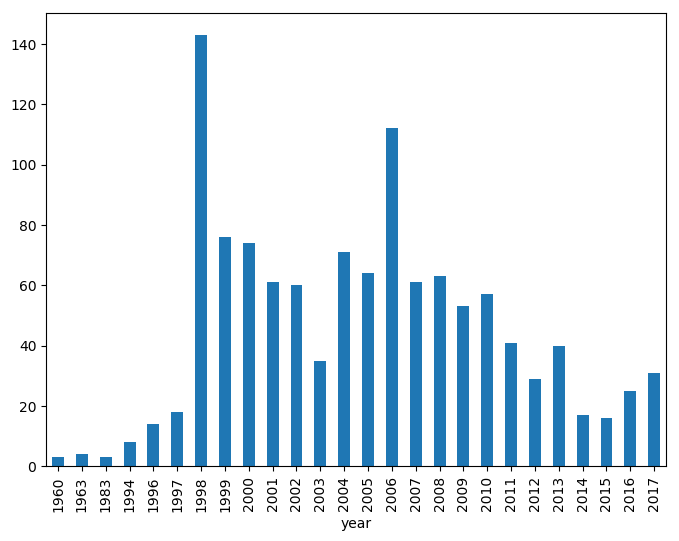

In [55]:
# Plot the number of "zinedines" as a function of the year
zinedines_per_year.plot.bar()

-------------
## Acknowledgements
<a id='Acknowledgements'></a>

These are the sources this notebook is based on. You are encouraged to consult them to deep further:

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jave VanderPlas (highly recommended book)
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
* Data School [Pandas best practices](https://youtu.be/hl-TGI4550M) (video)
* Dunder Data's [Intro to Pandas](https://youtu.be/31wa8tmrkPU) video series
* Python Bootcamp organised by the [Berkeley Institute for Data Science (BIDS)](https://bids.berkeley.edu) in the Fall 2016: [videos](https://bids.berkeley.edu/news/python-boot-camp-fall-2016-training-videos-available-online) and [notebooks](https://github.com/profjsb/python-bootcamp)
* [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653) 2nd Edition, by Wes McKinney